Assignment 3 (due on 11/22)

Student：温承彦（12332279），Gtihub：WCY339

批改人：赵淑慧

得分：53/60

In [1]:
#导入Python工具包
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

# PS1. Niño 3.4 index
19/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。10/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。——图中的黑线不是三个月的滑动平均数据。9/10

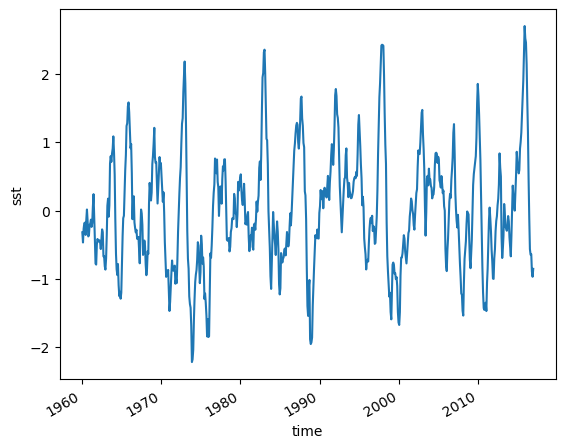

In [2]:
# 打开NOAA_NCDC_ERSST_v3b_SST.nc文件，读取数据集ds
ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc",engine="netcdf4")
# 计算海洋表面温度的气候态
sst_clim = ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240)).groupby('time.month').mean()
sst_clim
# 按月份对数据集进行分组
group_data = ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240)).groupby('time.month')

# 去除气候态，得到异常值 
sst_anom = group_data - sst_clim
sst_anom

# 绘制全球海洋表面温度平均异常值
sst_anom.mean(dim=['lat', 'lon']).plot()
plt.show()

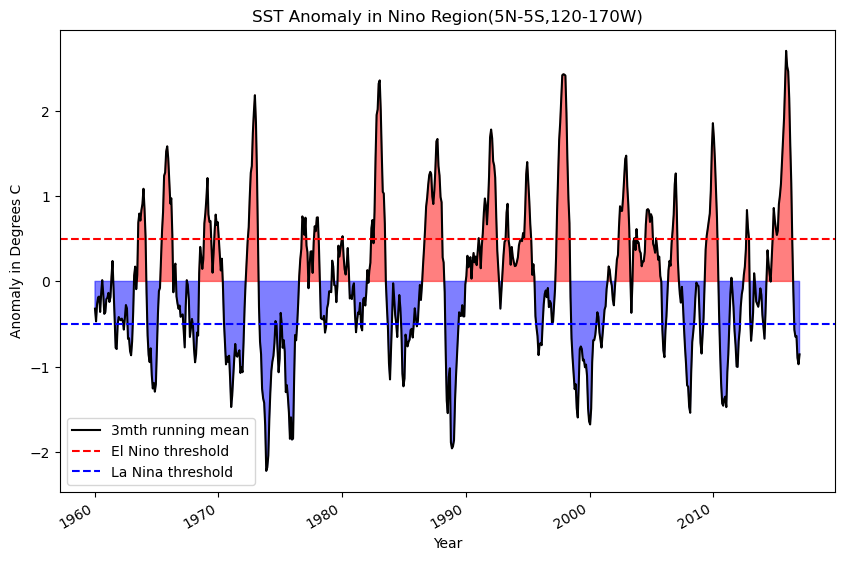

In [3]:
# 打开NOAA_NCDC_ERSST_v3b_SST.nc文件，读取数据集ds
ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

# 计算海温的气候态
sst_clim = ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240)).groupby('time.month').mean()

# 按月份对数据进行分组
group_data = ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240)).groupby('time.month')

# # 去除气候态，得到异常值,在经度和纬度两个纬度上计算异常值的均值
sst_anom = group_data - sst_clim
sst_anom_mean = sst_anom.mean(dim=['lat', 'lon'])

# 计算三个月的滑动平均值及厄尔尼诺3.4指数
sst_anom_mean_smoothed = sst_anom_mean.rolling(time=3, min_periods=1).mean()

# 创建画布及图形
fig,ax = plt.subplots(figsize=(10, 6))

# 绘制厄尔尼诺3.4指数
sst_anom_mean.plot(ax=ax, label='3mth running mean', color='black')

# 填充大于0的区域为红色，小于0的区域为蓝色
ax.fill_between(sst_anom_mean.time.values, sst_anom_mean, where=sst_anom_mean > 0, color='red', interpolate=True, alpha=0.5)
ax.fill_between(sst_anom_mean.time.values, sst_anom_mean, where=sst_anom_mean <= 0, color='blue', interpolate=True, alpha=0.5)

# 区分El Nino和La Nina事件
el_nino_threshold = 0.5
lanina_threshold = -0.5
ax.axhline(y=el_nino_threshold, color='r', linestyle='--', label='El Nino threshold')
ax.axhline(y=lanina_threshold, color='b', linestyle='--', label='La Nina threshold')

# 添加标题，标签以及图例
plt.title('SST Anomaly in Nino Region(5N-5S,120-170W)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.legend()

# 显示图形
plt.show()

# PS2. Earth’s energy budget
25/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。5/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。——应标明变量单位；解释很详细。9+1/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——计算辐射总量应按面积乘算，结果单位为W。3/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。——toa_cre_xx_mon是云影响的辐射通量，不是总出射辐射通量。3/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？——计算全球平均值需要按面积权重平均。4/5

In [4]:
# Open a netCDF4 file
da = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc",engine="netcdf4")
da

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

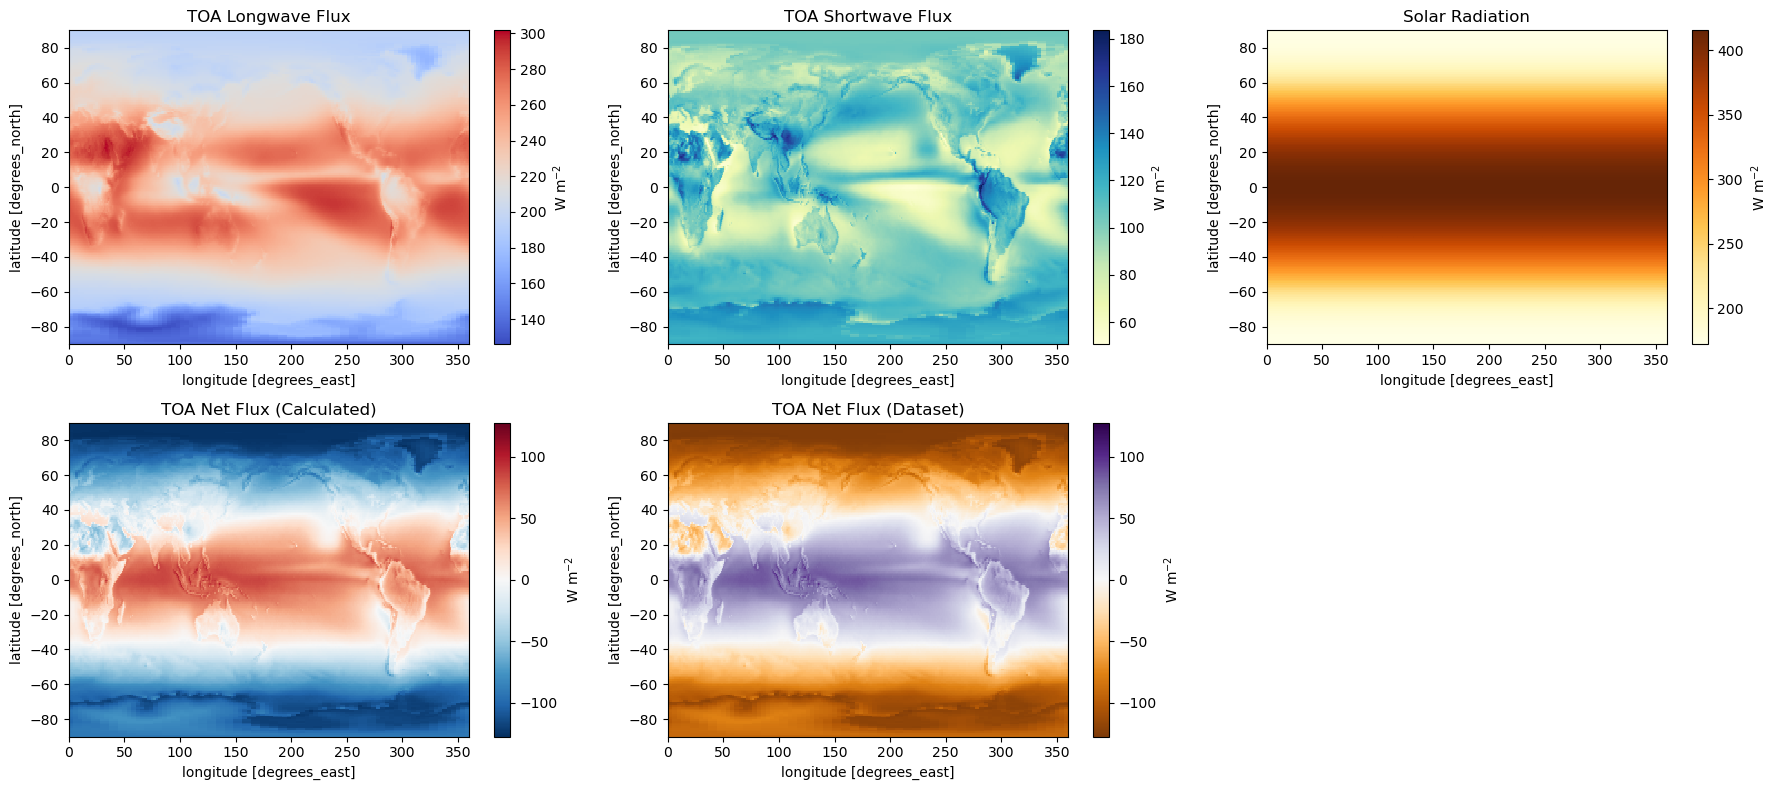

In [6]:
# 读取数据集
da = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")

# 计算时间平均值
toa_lw_mean = da['toa_lw_all_mon'].mean(dim='time')# 计算 TOA 长波辐射的时间平均值
toa_sw_mean = da['toa_sw_all_mon'].mean(dim='time')# 计算 TOA 短波辐射的时间平均值
solar_mean = da['solar_mon'].mean(dim='time')# 计算太阳辐射的时间平均值

# 计算 TOA 净辐射
toa_net_calc =solar_mean - toa_sw_mean - toa_lw_mean

# 创建不规则的子图网格
fig = plt.figure(figsize=(18, 8))
gs = GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])

# 绘制 TOA 长波辐射空间分布图
ax0 = plt.subplot(gs[0, 0])
toa_lw_mean.plot(ax=ax0, cmap='coolwarm', cbar_kwargs={'label': 'W m$^{-2}$'})
ax0.set_title('TOA Longwave Flux')

# 绘制 TOA 短波辐射空间分布图
ax1 = plt.subplot(gs[0, 1])
toa_sw_mean.plot(ax=ax1, cmap='YlGnBu', cbar_kwargs={'label': 'W m$^{-2}$'})
ax1.set_title('TOA Shortwave Flux')

# 绘制太阳辐射空间分布图
ax2 = plt.subplot(gs[0, 2])
solar_mean.plot(ax=ax2, cmap='YlOrBr', cbar_kwargs={'label': 'W m$^{-2}$'})
ax2.set_title('Solar Radiation')

# 绘制TOA 净辐射(经计算)空间分布图
ax3 = plt.subplot(gs[1, 0])
toa_net_calc.plot(ax=ax3, cmap='RdBu_r', cbar_kwargs={'label': 'W m$^{-2}$'})
ax3.set_title('TOA Net Flux (Calculated)')

# 绘制TOA 净辐射(数据集)空间分布图
ax4 = plt.subplot(gs[1, 1])
da['toa_net_all_mon'].mean(dim='time').plot(ax=ax4, cmap='PuOr', cbar_kwargs={'label': 'W m$^{-2}$'})
ax4.set_title('TOA Net Flux (Dataset)')

# 隐藏空白子图图框
fig.delaxes(plt.subplot(gs[1, 2]))

plt.tight_layout()
plt.show()

In [7]:
# 地球半径（以米为单位）
earth_radius = 6371e3
# 计算纬度和经度的差分（以弧度为单位）
dlat_rad = np.deg2rad(np.diff(da['lat'].values))
dlon_rad = np.deg2rad(np.diff(da['lon'].values))
# 添加额外的差分，以匹配网格单元的大小
dlat_rad = np.append(dlat_rad, dlat_rad[-1])
dlon_rad = np.append(dlon_rad, dlon_rad[-1])
# 计算每个纬度权重及网格面积
lat_edges = np.deg2rad(da['lat'].values) - dlat_rad / 2
lat_edges = np.append(lat_edges, lat_edges[-1] + dlat_rad[-1])  # Add the last edge
weights = np.sin(lat_edges[1:]) - np.sin(lat_edges[:-1])
grid_area_lat = earth_radius**2 * dlat_rad * weights
# 计算每个单元的总网格面积
grid_area = np.outer(grid_area_lat, dlon_rad)
# 计算三个变量的时间平均值
toa_lw_mean = da['toa_lw_all_mon'].mean(dim='time')
toa_sw_mean = da['toa_sw_all_mon'].mean(dim='time')
solar_mean = da['solar_mon'].mean(dim='time')
# 使用 grid_area_da 来加权平均
grid_area_da = xr.DataArray(grid_area, dims=["lat", "lon"], coords={"lat": da['lat'], "lon": da['lon']})
solar_mean = (da['solar_mon'].mean(dim='time') * grid_area_da).sum(dim=('lon', 'lat')) / grid_area_da.sum()
toa_lw_mean = (da['toa_lw_all_mon'].mean(dim='time') * grid_area_da).sum(dim=('lon', 'lat')) / grid_area_da.sum()
toa_sw_mean = (da['toa_sw_all_mon'].mean(dim='time') * grid_area_da).sum(dim=('lon', 'lat')) / grid_area_da.sum()
# 打印结果
print('TOA Incoming Solar Flux:', solar_mean.values)
print('TOA Outgoing Longwave Flux:', toa_lw_mean.values)
print('TOA Outgoing Shortwave Flux:', toa_sw_mean.values)


TOA Incoming Solar Flux: 340.28513
TOA Outgoing Longwave Flux: 240.268
TOA Outgoing Shortwave Flux: 99.139046


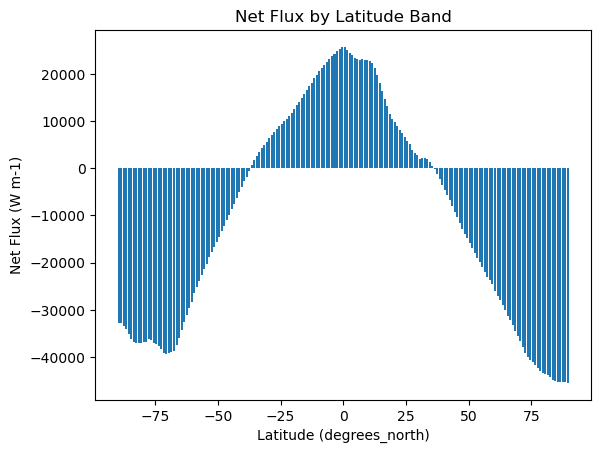

In [35]:
# 计算每个1度纬度带的净辐射总量
net_flux_by_latitude = da['toa_net_all_mon'].sum(dim='lon')

# 绘制柱状图
plt.bar(net_flux_by_latitude['lat'], net_flux_by_latitude.mean(dim='time'))

# 添加标签和标题
plt.xlabel('Latitude (degrees_north)')
plt.ylabel('Net Flux (W m-1)')
plt.title('Net Flux by Latitude Band')

# 显示图形
plt.show()

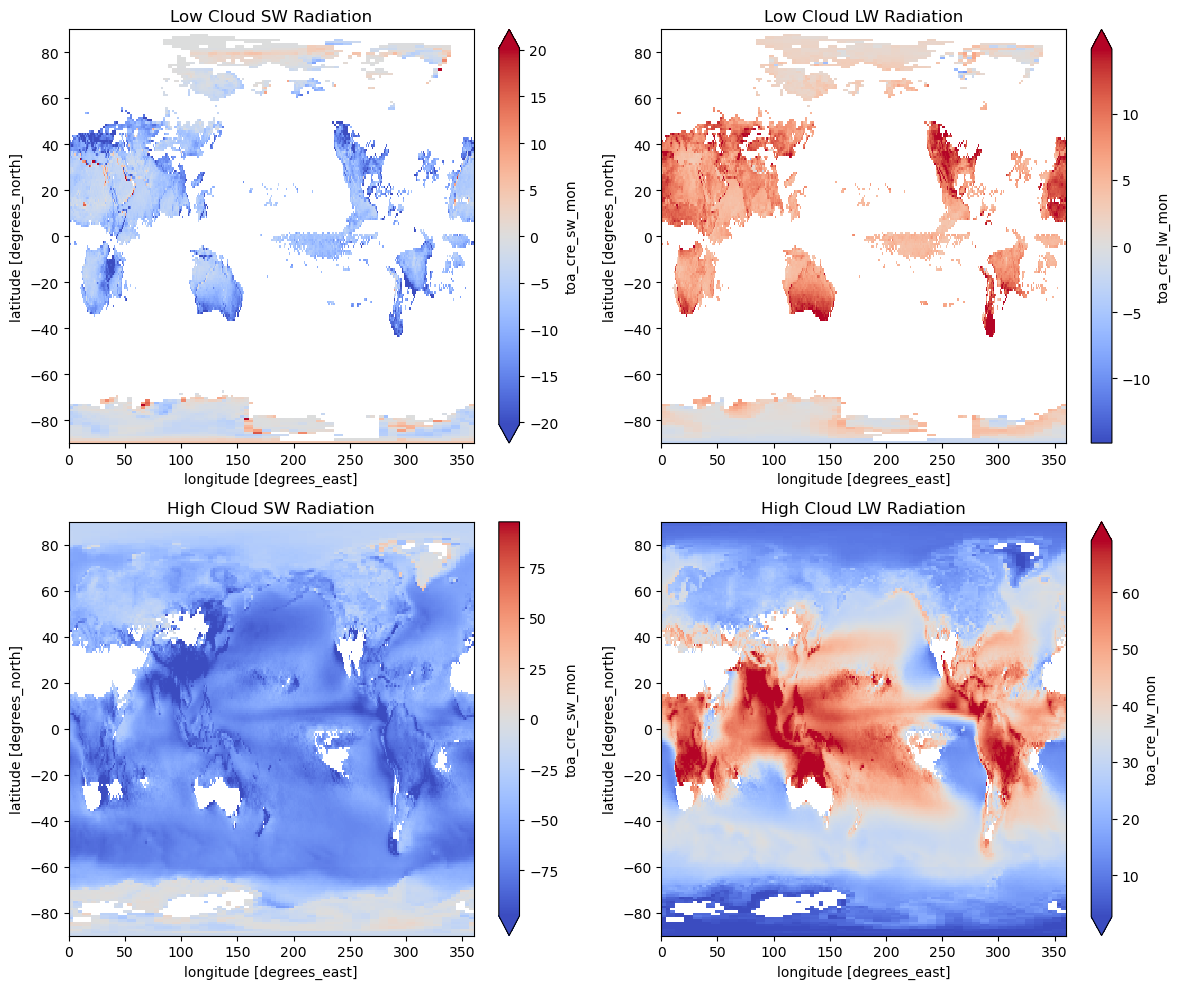

In [8]:
# 计算低云和高云区的时间平均输出短波和长波辐射
low_cloud_mask = da['cldarea_total_daynight_mon'] <= 25
high_cloud_mask = da['cldarea_total_daynight_mon'] >= 75

toa_cre_sw_low_cloud = da['toa_cre_sw_mon'].where(low_cloud_mask).mean(dim='time')
toa_cre_lw_low_cloud = da['toa_cre_lw_mon'].where(low_cloud_mask).mean(dim='time')

toa_cre_sw_high_cloud = da['toa_cre_sw_mon'].where(high_cloud_mask).mean(dim='time')
toa_cre_lw_high_cloud = da['toa_cre_lw_mon'].where(high_cloud_mask).mean(dim='time')

# 绘制合成图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 低云区输出短波辐射
toa_cre_sw_low_cloud.plot(ax=axes[0, 0], cmap='coolwarm', robust=True)
axes[0, 0].set_title('Low Cloud SW Radiation')

# 低云区输出长波辐射
toa_cre_lw_low_cloud.plot(ax=axes[0, 1], cmap='coolwarm', robust=True)
axes[0, 1].set_title('Low Cloud LW Radiation')

# 高云区输出短波辐射
toa_cre_sw_high_cloud.plot(ax=axes[1, 0], cmap='coolwarm', robust=True)
axes[1, 0].set_title('High Cloud SW Radiation')

# 高云区输出长波辐射
toa_cre_lw_high_cloud.plot(ax=axes[1, 1], cmap='coolwarm', robust=True)
axes[1, 1].set_title('High Cloud LW Radiation')

plt.tight_layout()
plt.show()

In [4]:
# 定义低云区和高云区
low_cloud_mask = da['cldarea_total_daynight_mon'] <= 25
high_cloud_mask = da['cldarea_total_daynight_mon'] >= 75

# 计算全球短波辐射和长波辐射平均值
toa_sw_all_global = da['toa_sw_all_mon'].mean(dim=('lon', 'lat','time'))
toa_lw_all_global = da['toa_lw_all_mon'].mean(dim=('lon', 'lat','time'))

# 在低云区合成
toa_sw_low_cloud = da['toa_sw_all_mon'].where(low_cloud_mask).mean(dim=('lon', 'lat','time'))
toa_lw_low_cloud = da['toa_lw_all_mon'].where(low_cloud_mask).mean(dim=('lon', 'lat','time'))

# 在高云区合成
toa_sw_high_cloud = da['toa_sw_all_mon'].where(high_cloud_mask).mean(dim=('lon', 'lat','time'))
toa_lw_high_cloud = da['toa_lw_all_mon'].where(high_cloud_mask).mean(dim=('lon', 'lat','time'))

# 打印结果
print("全球平均短波辐射:", toa_sw_all_global.values)
print("全球平均长波辐射:", toa_lw_all_global.values)
print("低云区平均短波辐射:", toa_sw_low_cloud.values)
print("低云区平均长波辐射:", toa_lw_low_cloud.values)
print("高云区平均短波辐射:", toa_sw_high_cloud.values)
print("高云区平均长波辐射:", toa_lw_high_cloud.values)

全球平均短波辐射: 102.30436
全球平均长波辐射: 224.7552
低云区平均短波辐射: 97.11116
低云区平均长波辐射: 247.33109
高云区平均短波辐射: 111.76594
高云区平均长波辐射: 215.39049


# PS3. Explore a netCDF dataset
9/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。5/5
2. 用该数据集绘制至少5种不同的图。——部分图缺少变量单位。4/5

In [16]:
dm = xr.open_dataset('merged.nc')
dm.info()

xarray.Dataset {
dimensions:
	time = 36 ;
	bnds = 2 ;
	lon = 360 ;
	lat = 150 ;

variables:
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:bounds = time_bnds ;
		time:axis = T ;
	datetime64[ns] time_bnds(time, bnds) ;
	float32 lon(lon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:axis = X ;
	float32 lat(lat) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:axis = Y ;
	float32 Swnet_tavg(time, lat, lon) ;
		Swnet_tavg:standard_name = surface_net_downward_shortwave_flux ;
		Swnet_tavg:long_name = Net short wave radiation flux ;
		Swnet_tavg:units = W m-2 ;
		Swnet_tavg:cell_methods = time: mean ;
		Swnet_tavg:vmin = 0.0 ;
		Swnet_tavg:vmax = 317.6919250488281 ;
	float32 Lwnet_tavg(time, lat, lon) ;
		Lwnet_tavg:standard_name = surface_net_downward_longwave_flux ;
		Lwnet_tavg:long_name = Net long-wave radiation flux ;
		Lwnet_tavg:units =

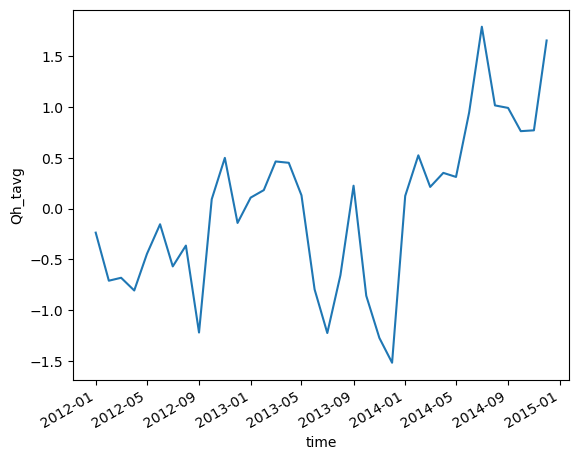

In [6]:
# 打开下载的数据集，并保存在变量dm中
dm = xr.open_dataset("merged.nc",engine="netcdf4")
# 计算显热净通量的气候态
Qh_tavg_clim = dm['Qh_tavg'].groupby('time.month').mean()
Qh_tavg_clim
# 按月对数据进行分组
group_data = dm['Qh_tavg'].groupby('time.month')

# 计算显热净通量的异常值
Qh_tavg_anom = group_data - Qh_tavg_clim
Qh_tavg_anom

# 绘制结果图
Qh_tavg_anom.mean(dim=['lat', 'lon']).plot()

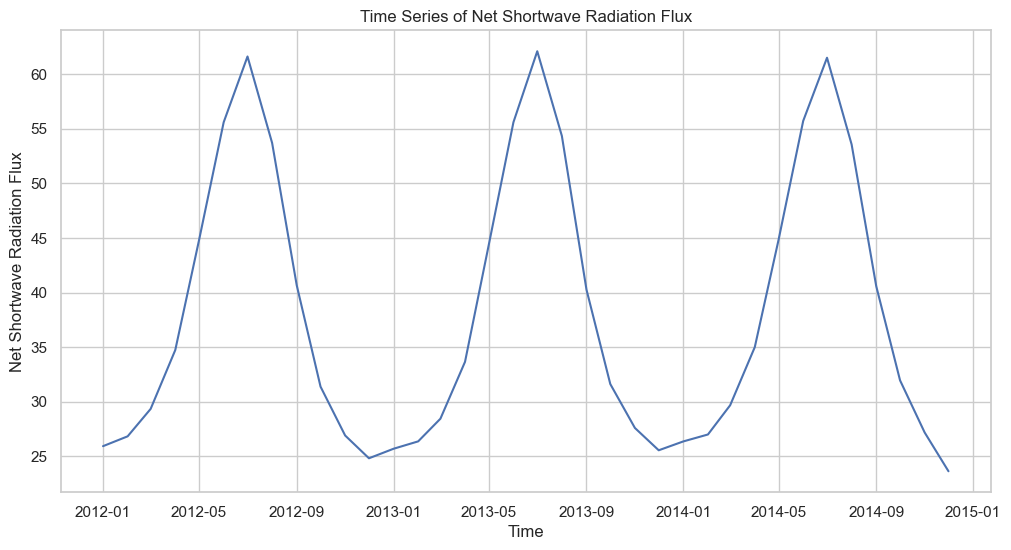

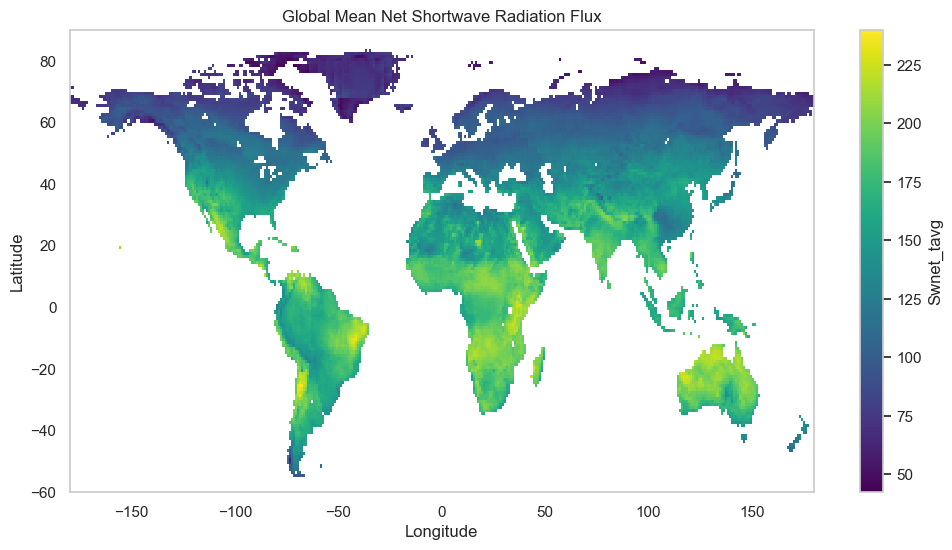

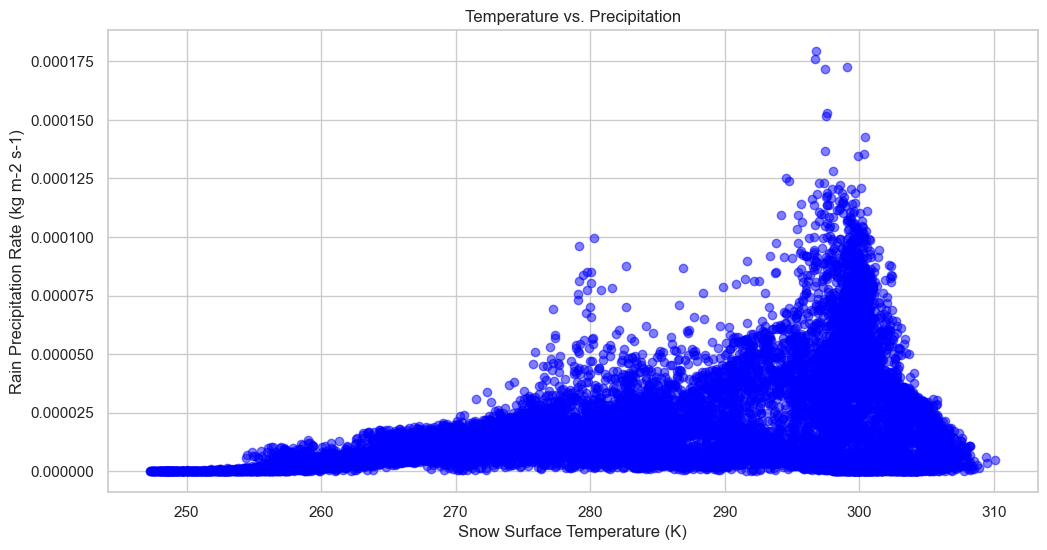

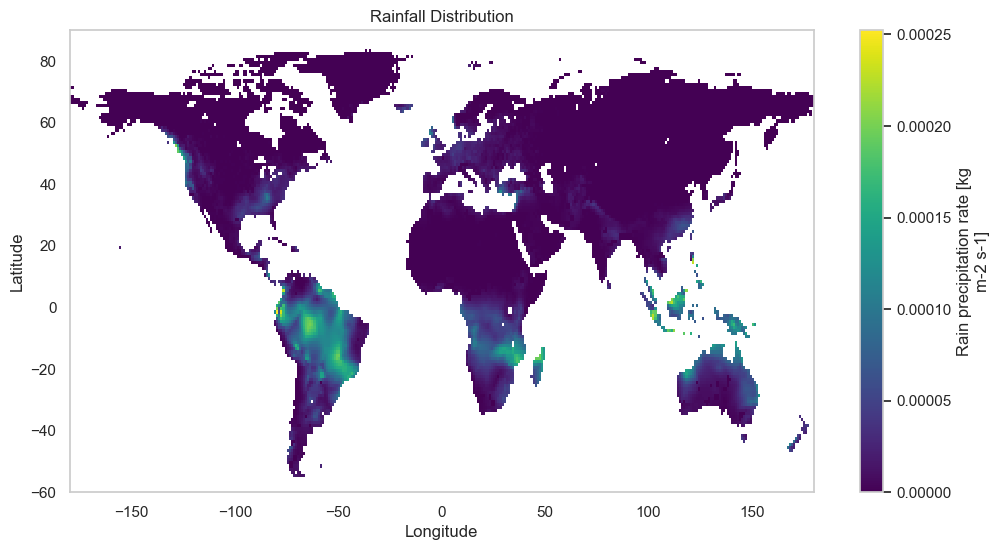

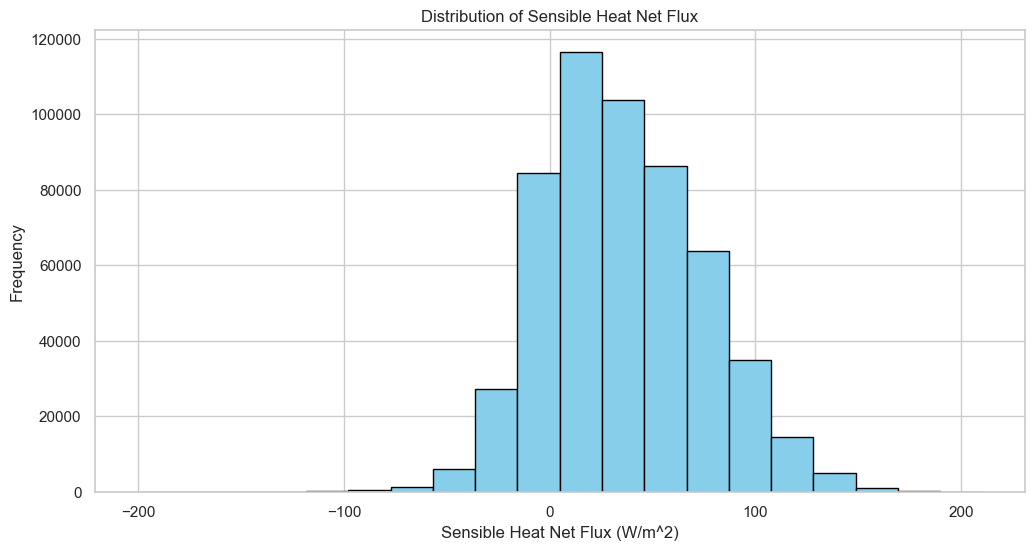

In [10]:
# 加载数据集
ds = xr.open_dataset('merged.nc')

# 绘制短波净辐射通量的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(dm['time'], dm['Qle_tavg'].mean(dim=('lat', 'lon')))
plt.xlabel('Time')
plt.ylabel('Net Shortwave Radiation Flux')
plt.title('Time Series of Net Shortwave Radiation Flux')
plt.show()

# 绘制全球平均短波净辐射通量分布图
global_mean_swnet = ds['Swnet_tavg'].mean(dim='time')

plt.figure(figsize=(12, 6))
global_mean_swnet.plot()
plt.title('Global Mean Net Shortwave Radiation Flux')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# 绘制散点图
temperature = ds['SnowT_tavg'].mean(dim='time')
precipitation = ds['Rainf_tavg'].mean(dim='time')
plt.figure(figsize=(12, 6))
plt.scatter(temperature, precipitation, c='blue', alpha=0.5)
plt.title('Temperature vs. Precipitation')
plt.xlabel('Snow Surface Temperature (K)')
plt.ylabel('Rain Precipitation Rate (kg m-2 s-1)')
plt.show()
# 绘制降水量在地图上的分布
plt.figure(figsize=(12, 6))
ds['Rainf_tavg'].isel(time=0).plot.pcolormesh()
plt.title('Rainfall Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# 绘制显热通量的直方图
plt.figure(figsize=(12, 6))
plt.hist(dm['Qh_tavg'].values.flatten(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sensible Heat Net Flux (W/m^2)')
plt.ylabel('Frequency')
plt.title('Distribution of Sensible Heat Net Flux')
plt.show()


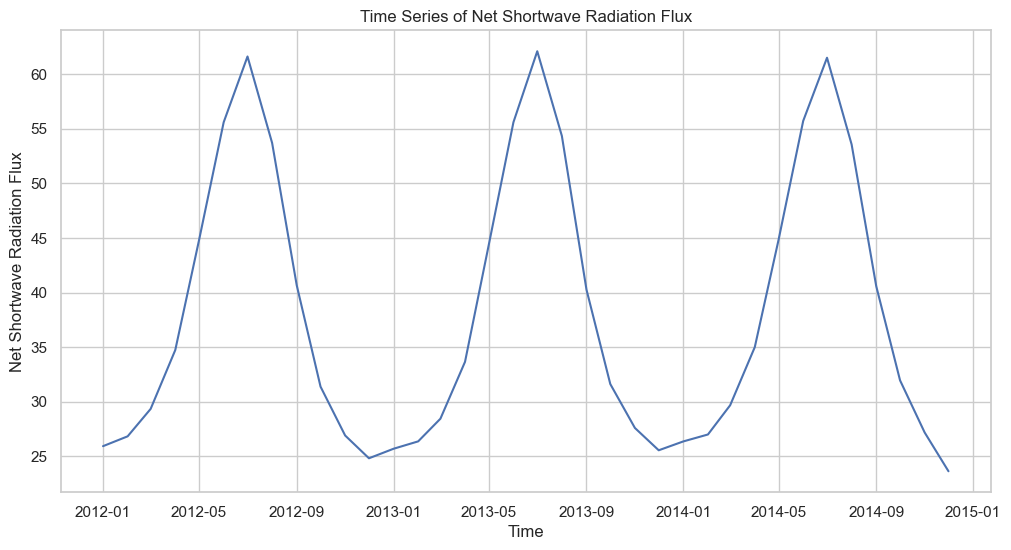

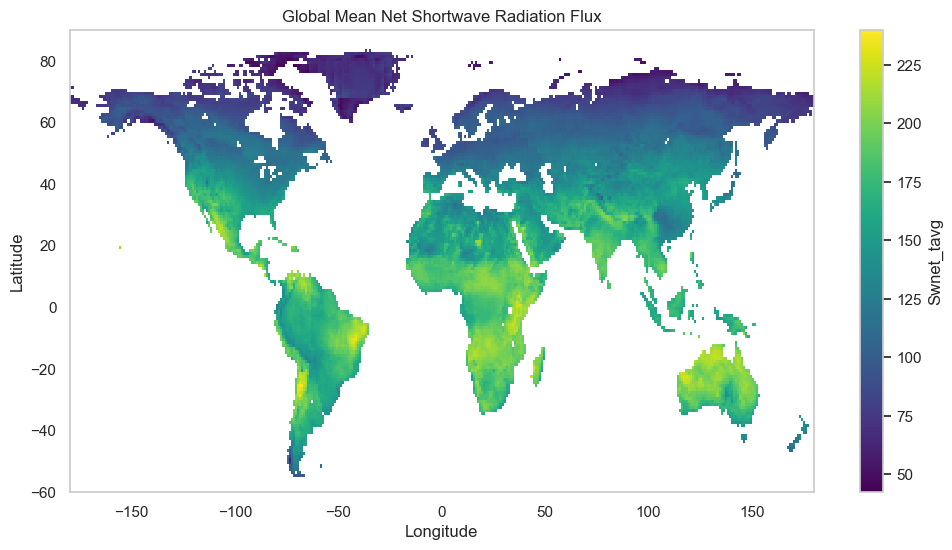

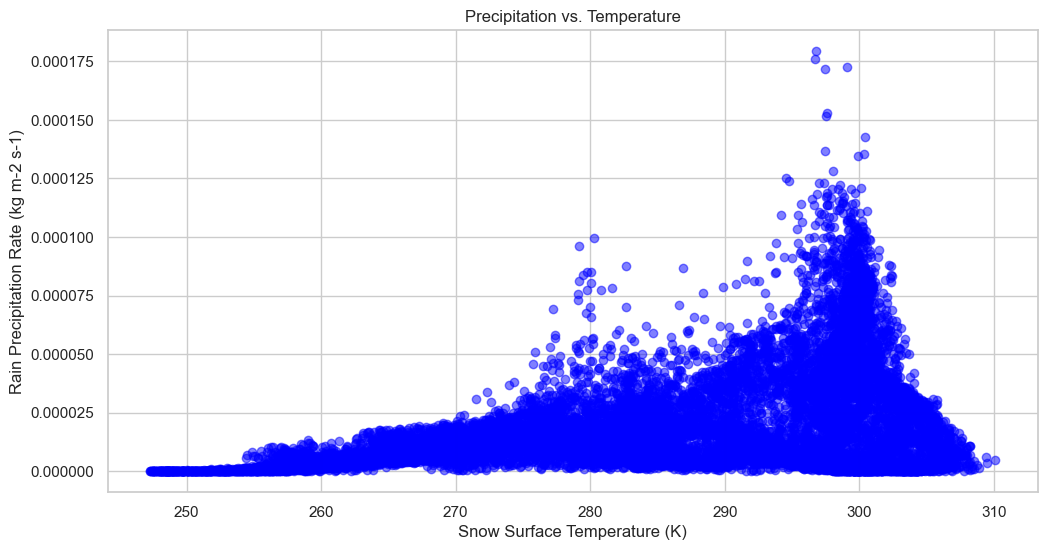

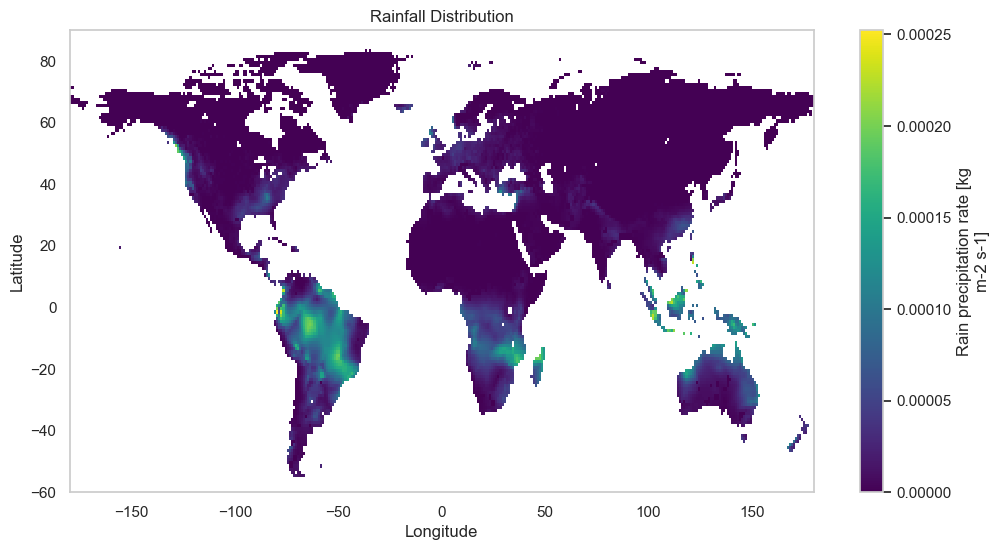

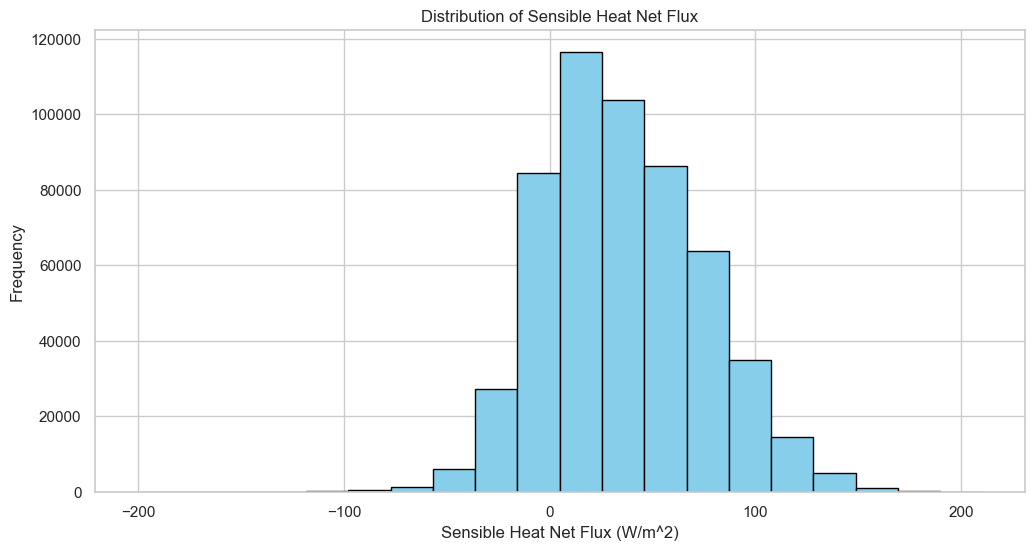

In [15]:
# 加载数据集
ds = xr.open_dataset('merged.nc')

# 绘制短波净辐射通量的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(ds['time'], ds['Qle_tavg'].mean(dim=('lat', 'lon')))
plt.xlabel('Time')
plt.ylabel('Net Shortwave Radiation Flux')
plt.title('Time Series of Net Shortwave Radiation Flux')
plt.show()

# 绘制全球平均短波净辐射通量分布图
global_mean_swnet = ds['Swnet_tavg'].mean(dim='time')

plt.figure(figsize=(12, 6))
global_mean_swnet.plot()
plt.title('Global Mean Net Shortwave Radiation Flux')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 绘制降雨速率与雪表面温度散点图
temperature = ds['SnowT_tavg'].mean(dim='time')
precipitation = ds['Rainf_tavg'].mean(dim='time')
plt.figure(figsize=(12, 6))
plt.scatter(temperature, precipitation, c='blue', alpha=0.5)
plt.title('Precipitation vs. Temperature')
plt.xlabel('Snow Surface Temperature (K)')
plt.ylabel('Rain Precipitation Rate (kg m-2 s-1)')
plt.show()

# 绘制降水量在地图上的分布
plt.figure(figsize=(12, 6))
ds['Rainf_tavg'].isel(time=0).plot.pcolormesh()
plt.title('Rainfall Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 绘制显热通量的直方图
plt.figure(figsize=(12, 6))
plt.hist(ds['Qh_tavg'].values.flatten(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sensible Heat Net Flux (W/m^2)')
plt.ylabel('Frequency')
plt.title('Distribution of Sensible Heat Net Flux')
plt.show()